# **Libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import pickle

First, we should call some variables from data cleaning process.

In [ ]:
%store -r df
df = df

%store -r numeric_columns
numeric_columns = numeric_columns

# **Handle Outlier**

In this step, we will check for outliers for features. Since our evaluation metric is RMSE, which is sensitive to large errors, outliers can significantly......measurement.

# **Outlier Detection**

First, let's see the box plot to see the status of data.

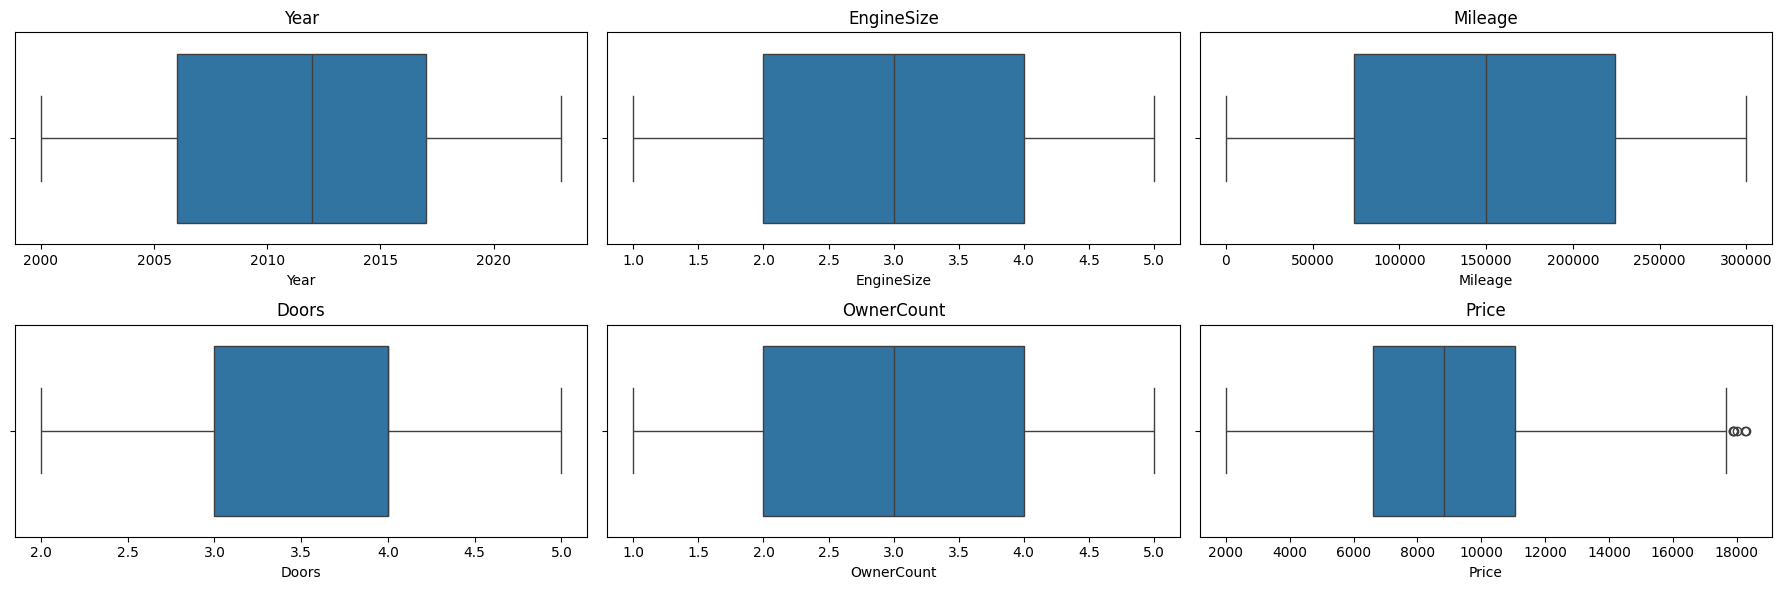

In [ ]:
def box_plot(columns):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 6))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'{col}')

    plt.tight_layout()
    plt.show()

# Example usage
box_plot(numeric_columns[:6])

We see, we have only a few outlier in Price and just because it's target, we can skip it and after transformation, that issue will be gone.

# **Categorical Encoding**

## **Mean-Target Encodeing**

Since **Brand** and **Model** have many unique values(high cardinality), we use Mean Target encoding for them.

- Calculate the Mean Target (Price) for Each category.
- Replace category in with its Corresponding mean Price

In [ ]:
# Brand
brand_mean_price = df.groupby('Brand')['Price'].mean()
df['Encoded_Brand'] = df['Brand'].map(brand_mean_price)

model_mean_price = df.groupby('Model')['Price'].mean()
df['Encoded_Model'] = df['Model'].map(model_mean_price)

# Drop
df.drop(['Brand', 'Model'], axis=1, inplace=True)

KeyError: 'Brand'

Now, we should save it for **future usage**.

In [ ]:
with open('../../models/Brand_Encoder.pkl', 'wb') as f:
    pickle.dump(brand_mean_price, f)

with open('../../models/Model_Encoder.pkl', 'wb') as f:
    pickle.dump(model_mean_price, f)

## **One-Hot Encoder**

Now, for Transmission and Fuel, just because they don't have too many cardinality, we can use one-hot encoding.

In [ ]:
# Select categorical columns to encode
categorical_cols = ['Fuel', 'Transmission']

# Define OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit and transform only selected categorical columns
encoded_array = encoder.fit_transform(df[categorical_cols])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

#Drop original categorical columns and merge encoded ones
df_encoded = df.drop(columns=categorical_cols).reset_index(drop=True)
df = pd.concat([df_encoded, encoded_df], axis=1)


In [ ]:
with open('../../models/OneHot_Encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

# **CHECKPOINT**

In [ ]:
%store df

Stored 'df' (DataFrame)
